# **PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões (2024)**

## *Segundo Exercício Programa - ANN para o Dataset MNIST*

**Nome**: Lucas Carvalho

**NUSP**: 11850649

**Hash**: 105

## *Descrição:*

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

## Ambiente de Execução

In [1]:
import pickle
import random
import numpy as np
import os
from os.path import join

%matplotlib inline
import random
import matplotlib.pyplot as plt

from collections import Counter

## Loading dos Dados

In [2]:
# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

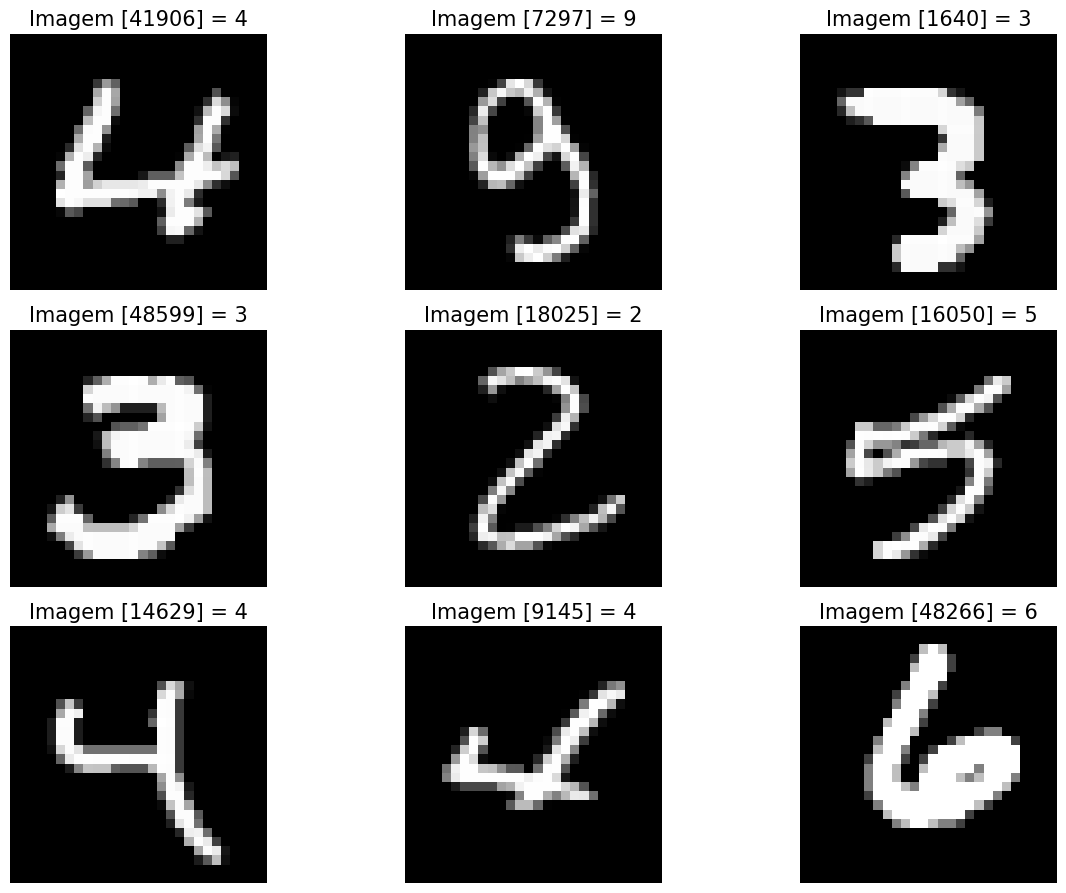

In [3]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# Tarefa 01: Probabilidades 

### Item a)

Descubra o número do Dataset associado ao seu Hash.


In [9]:
y_tot[105]

1

*Apresentando a imagem visualmente:*

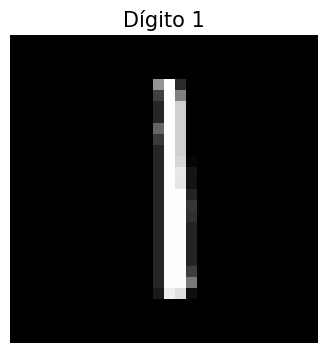

In [10]:
plt.figure(figsize=(4, 4))  
plt.imshow(X_tot[105], cmap='gray')  
plt.axis('off')  
plt.title(f"Dígito {y_tot[105]}", fontsize=15)  
plt.show() 

In [ ]:
X

### Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [64]:
light_pixel = 0
total = 0

for row in X_tot[105]:
    for pixel in row:
        total += 1
        if pixel >= 128 and pixel <= 225: light_pixel += 1
        
f"{100*light_pixel/total} %"

'1.1479591836734695 %'

*Na imagem vinculada, existe uma proababilidade de 1,14% de o pixel ser branco*

### Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [65]:
light_pixel = 0
total = 0

for i in range(len(X_tot)):
    if y_tot[i] == 1:
        for row in X_tot[i]:
            for pixel in row:
                total += 1
                if pixel >= 128 and pixel <= 225: light_pixel += 1
                
f"{100*light_pixel/total} %"

'2.3707988771716866 %'

*Existe uma proabilidade de 2,237% de, dentre todos os "1"s, existir um pixel branco dentre os pixels da imagem. Considerando que o valor obtido para a imagem referente ao Hash é relativamente próxima, é um resultado adequado, considerando o valor esperado.*

# Tarefa 02: Análise Exploratória de Dados 

### Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

*Não, embora sejam valores relativamente próximos, não é a mesma frequência, embora o valor médio de ocorrências seja, com efeito, 6000*

2. Qual o valor médio dos píxeis de cada dígito?

*Estão indicados abaixo, para cada um dos dígitos*

In [66]:
count_dict = Counter(y_tot)

total_count = 0
pixel_sums_by_digit = {i: 0 for i in range(10)}  
pixel_counts_by_digit = {i: 0 for i in range(10)}  

for img, label in zip(X_tot, y_tot):
    flattened_img = img.flatten()  
    pixel_sums_by_digit[label] += np.sum(flattened_img)
    pixel_counts_by_digit[label] += len(flattened_img)

print("Contagem e valor médio de pixels por dígito:")
for number in range(10):
    count = count_dict.get(number, 0)
    total_count += count
    average_pixel_value = pixel_sums_by_digit[number] / pixel_counts_by_digit[number] if pixel_counts_by_digit[number] > 0 else 0
    print(f"Dígito {number}: {count} ocorrências, valor médio dos pixels = {average_pixel_value:.2f}")

average_count = total_count / 10
print(f"Valor médio de ocorrências: {average_count:.2f}")

Contagem e valor médio de pixels por dígito:
Dígito 0: 5920 ocorrências, valor médio dos pixels = 44.23
Dígito 1: 6725 ocorrências, valor médio dos pixels = 19.40
Dígito 2: 6023 ocorrências, valor médio dos pixels = 38.02
Dígito 3: 6107 ocorrências, valor médio dos pixels = 36.23
Dígito 4: 5918 ocorrências, valor médio dos pixels = 31.04
Dígito 5: 5376 ocorrências, valor médio dos pixels = 32.92
Dígito 6: 5915 ocorrências, valor médio dos pixels = 35.24
Dígito 7: 6238 ocorrências, valor médio dos pixels = 29.26
Dígito 8: 5856 ocorrências, valor médio dos pixels = 38.40
Dígito 9: 5922 ocorrências, valor médio dos pixels = 31.34
Valor médio de ocorrências: 6000.00


### Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


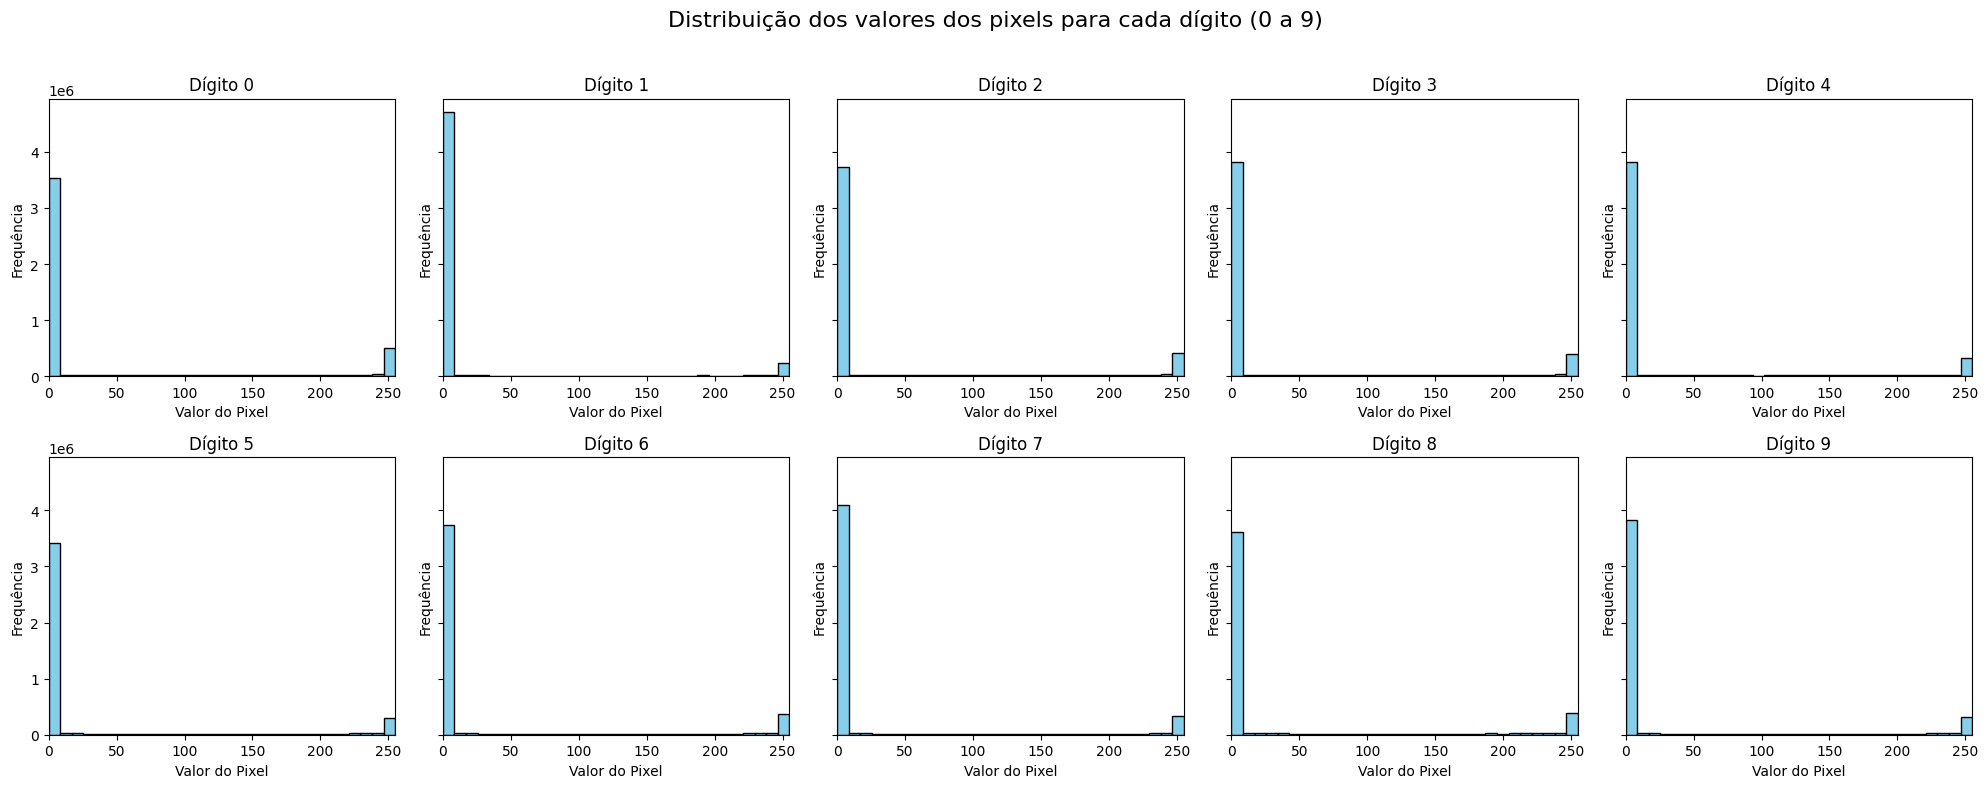

In [67]:
pixels_by_digit = {i: [] for i in range(10)}

for img, label in zip(X_tot, y_tot):
    flattened_img = img.flatten()  
    pixels_by_digit[label].extend(flattened_img)
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharey=True)
fig.suptitle("Distribuição dos valores dos pixels para cada dígito (0 a 9)", fontsize=16)

for i, ax in enumerate(axes.flatten()):
    ax.hist(pixels_by_digit[i], bins=30, color="skyblue", edgecolor="black")
    ax.set_title(f"Dígito {i}")
    ax.set_xlim([0, 255]) 
    ax.set_xlabel("Valor do Pixel")
    ax.set_ylabel("Frequência")

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


*Como pode ser visto, há muitos valores apagados, ou seja, com valor 0, isso é até mesmo fácil de identificar ao dar print em alguma listas de números, com isso, o valor médio dos pixels e deslocado à esquerda*

### Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

*Para tanto, reutilizei os resultados de contagem e valor médio do item a, e também a função de apresentação das imagens, elas não ficaram tão nítidas, um pouco ruins, mas são reconhecíveis*

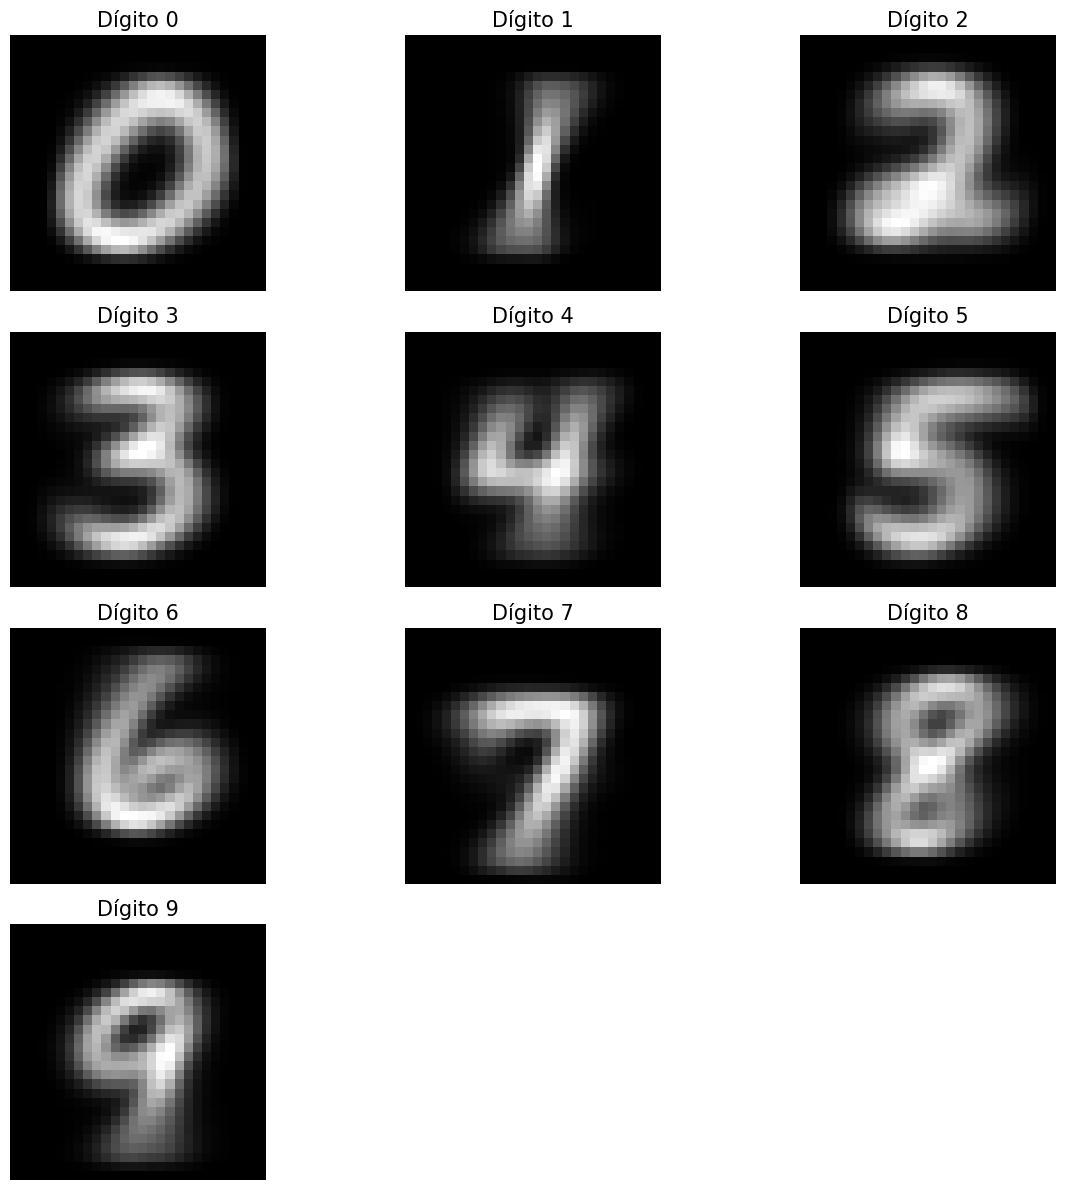

In [68]:
def show_images(images, title_texts):
    cols = 3  
    rows = int(len(images) / cols) + 1 
    plt.figure(figsize=(12, 12))  
    index = 1
    for image, title_text in zip(images, title_texts):
        plt.subplot(rows, cols, index)  
        plt.axis('off') 
        plt.imshow(image, cmap=plt.cm.gray)  
        plt.title(title_text, fontsize=15)  
        index += 1
    plt.tight_layout()  
    plt.show()  

pixel_sums_by_digit = {i: np.zeros_like(X_tot[0], dtype=float) for i in range(10)}
counts_by_digit = {i: 0 for i in range(10)}

for img, label in zip(X_tot, y_tot):
    pixel_sums_by_digit[label] += img
    counts_by_digit[label] += 1

average_images = []
titles = []
for digit in range(10):
    if counts_by_digit[digit] > 0:
        average_image = pixel_sums_by_digit[digit] / counts_by_digit[digit]
        average_images.append(average_image)
        titles.append(f"Dígito {digit}")
    else:
        print(f"Aviso: Nenhuma imagem encontrada para o dígito {digit}")

show_images(average_images, titles)


# Tarefa 03: Treinamento e Teste de Modelos

### Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

### Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

### Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

### Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


# Tarefa 04: Resultados e Visualizações

### Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

### Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

### Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.